# Visualización de Datasets
Script para mostrar 4 imágenes aleatorias de cada conjunto de datos utilizado en el repositorio SuperMask:
- Animals10
- CIFAR-10  
- MNIST

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import pickle
from PIL import Image
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Configurar matplotlib para mejor visualización
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [27]:
def show_animals10_samples():
    """Muestra 4 imágenes aleatorias del dataset Animals10"""
    animals_path = "../data/animals10/train"
    classes = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'ragno', 'sheep', 'squirrel']
    
    # Crear subplot
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle('Animals10 Dataset - Muestras Aleatorias', fontsize=16, fontweight='bold')
    
    for i, ax in enumerate(axes):
        # Seleccionar clase aleatoria
        random_class = random.choice(classes)
        class_path = os.path.join(animals_path, random_class)
        
        # Obtener lista de imágenes en esa clase
        if os.path.exists(class_path):
            images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            if images:
                # Seleccionar imagen aleatoria
                random_image = random.choice(images)
                image_path = os.path.join(class_path, random_image)
                
                # Cargar y mostrar imagen
                try:
                    img = Image.open(image_path)
                    ax.imshow(img)
                    ax.set_title(f'Clase: {random_class}', fontweight='bold')
                    ax.axis('off')
                except Exception as e:
                    ax.text(0.5, 0.5, f'Error cargando imagen\n{random_class}', 
                           ha='center', va='center', transform=ax.transAxes)
                    ax.axis('off')
            else:
                ax.text(0.5, 0.5, f'No se encontraron imágenes\nen {random_class}', 
                       ha='center', va='center', transform=ax.transAxes)
                ax.axis('off')
        else:
            ax.text(0.5, 0.5, f'Directorio no encontrado\n{random_class}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [28]:
def load_cifar10_batch(file_path):
    """Carga un batch de CIFAR-10"""
    with open(file_path, 'rb') as f:
        batch = pickle.load(f, encoding='bytes')
    return batch

def show_cifar10_samples():
    """Muestra 4 imágenes aleatorias del dataset CIFAR-10"""
    cifar_path = "../data/cifar10/cifar-10-batches-py"
    
    # Nombres de las clases en CIFAR-10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']
    
    # Cargar un batch aleatorio
    batch_files = [f'data_batch_{i}' for i in range(1, 6)]
    random_batch = random.choice(batch_files)
    batch_path = os.path.join(cifar_path, random_batch)
    
    if os.path.exists(batch_path):
        batch = load_cifar10_batch(batch_path)
        
        # Extraer datos
        data = batch[b'data']
        labels = batch[b'labels']
        
        # Crear subplot
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        fig.suptitle('CIFAR-10 Dataset - Muestras Aleatorias', fontsize=16, fontweight='bold')
        
        # Seleccionar 4 imágenes aleatorias
        random_indices = random.sample(range(len(data)), 4)
        
        for i, ax in enumerate(axes):
            idx = random_indices[i]
            
            # Reformatear imagen (CIFAR-10 está en formato [3072] -> [32,32,3])
            image = data[idx].reshape(3, 32, 32).transpose(1, 2, 0)
            label = labels[idx]
            
            ax.imshow(image)
            ax.set_title(f'Clase: {class_names[label]}', fontweight='bold')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"No se encontró el directorio CIFAR-10 en: {cifar_path}")
        print("Intentando cargar con torchvision...")
        
        # Alternativa usando torchvision
        try:
            transform = transforms.Compose([transforms.ToTensor()])
            dataset = datasets.CIFAR10(root='../data', train=True, download=False, transform=transform)
            
            fig, axes = plt.subplots(1, 4, figsize=(16, 4))
            fig.suptitle('CIFAR-10 Dataset - Muestras Aleatorias', fontsize=16, fontweight='bold')
            
            random_indices = random.sample(range(len(dataset)), 4)
            
            for i, ax in enumerate(axes):
                image, label = dataset[random_indices[i]]
                image = image.permute(1, 2, 0)  # Cambiar de [C,H,W] a [H,W,C]
                
                ax.imshow(image)
                ax.set_title(f'Clase: {class_names[label]}', fontweight='bold')
                ax.axis('off')
            
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error cargando CIFAR-10: {e}")

In [29]:
def show_mnist_samples():
    """Muestra 4 imágenes aleatorias del dataset MNIST"""
    mnist_path = "../data/MNIST"
    
    try:
        # Intentar cargar MNIST con torchvision
        transform = transforms.Compose([transforms.ToTensor()])
        dataset = datasets.MNIST(root=mnist_path, train=True, download=False, transform=transform)
        
        # Crear subplot
        fig, axes = plt.subplots(1, 4, figsize=(16, 4))
        fig.suptitle('MNIST Dataset - Muestras Aleatorias', fontsize=16, fontweight='bold')
        
        # Seleccionar 4 imágenes aleatorias
        random_indices = random.sample(range(len(dataset)), 4)
        
        for i, ax in enumerate(axes):
            image, label = dataset[random_indices[i]]
            
            # Convertir de tensor a numpy y quitar dimensión del canal
            image = image.squeeze().numpy()
            
            ax.imshow(image, cmap='gray')
            ax.set_title(f'Dígito: {label}', fontweight='bold')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error cargando MNIST con torchvision: {e}")
        print("Intentando cargar archivos MNIST manualmente...")
        
        # Alternativa: buscar archivos .pt o .pkl en el directorio
        mnist_files = []
        for root, dirs, files in os.walk(mnist_path):
            for file in files:
                if file.endswith(('.pt', '.pkl', '.gz')):
                    mnist_files.append(os.path.join(root, file))
        
        if mnist_files:
            print(f"Archivos MNIST encontrados: {mnist_files}")
        else:
            print("No se encontraron archivos MNIST. Creando datos de ejemplo...")
            
            # Crear datos de ejemplo si no se encuentra MNIST
            fig, axes = plt.subplots(1, 4, figsize=(16, 4))
            fig.suptitle('MNIST Dataset - Datos no disponibles (mostrando ejemplo)', fontsize=16, fontweight='bold')
            
            for i, ax in enumerate(axes):
                # Crear imagen de ejemplo
                example_image = np.random.rand(28, 28)
                example_label = random.randint(0, 9)
                
                ax.imshow(example_image, cmap='gray')
                ax.set_title(f'Ejemplo - Dígito: {example_label}', fontweight='bold')
                ax.axis('off')
            
            plt.tight_layout()
            plt.show()

In [30]:
def show_all_datasets():
    """Función principal que muestra muestras de todos los datasets"""    
    print("1. Mostrando muestras de Animals10...")
    show_animals10_samples()
    
    print("\n2. Mostrando muestras de CIFAR-10...")
    show_cifar10_samples()
    
    print("\n3. Mostrando muestras de MNIST...")
    show_mnist_samples()


1. Mostrando muestras de Animals10...


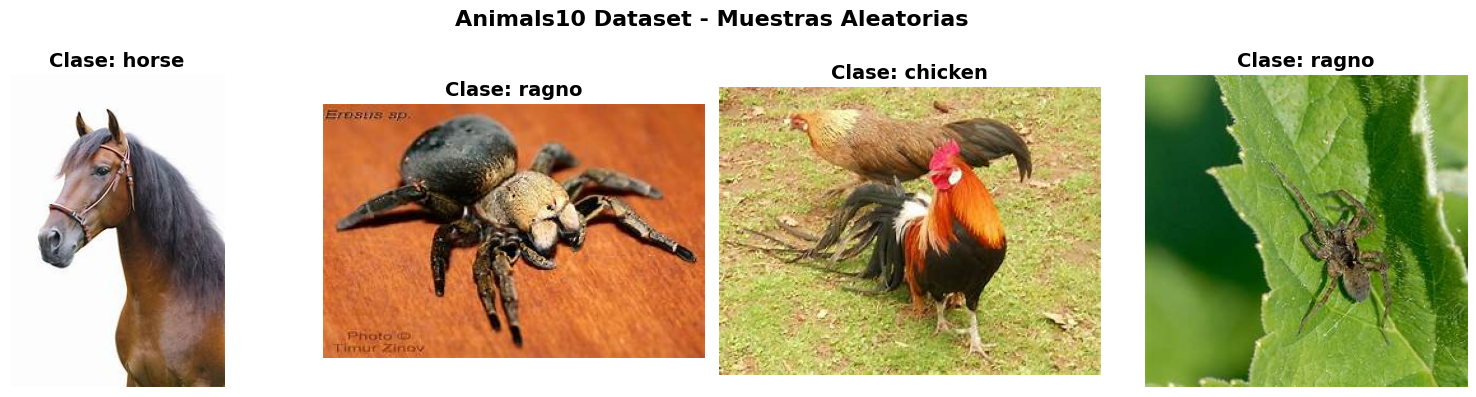


2. Mostrando muestras de CIFAR-10...


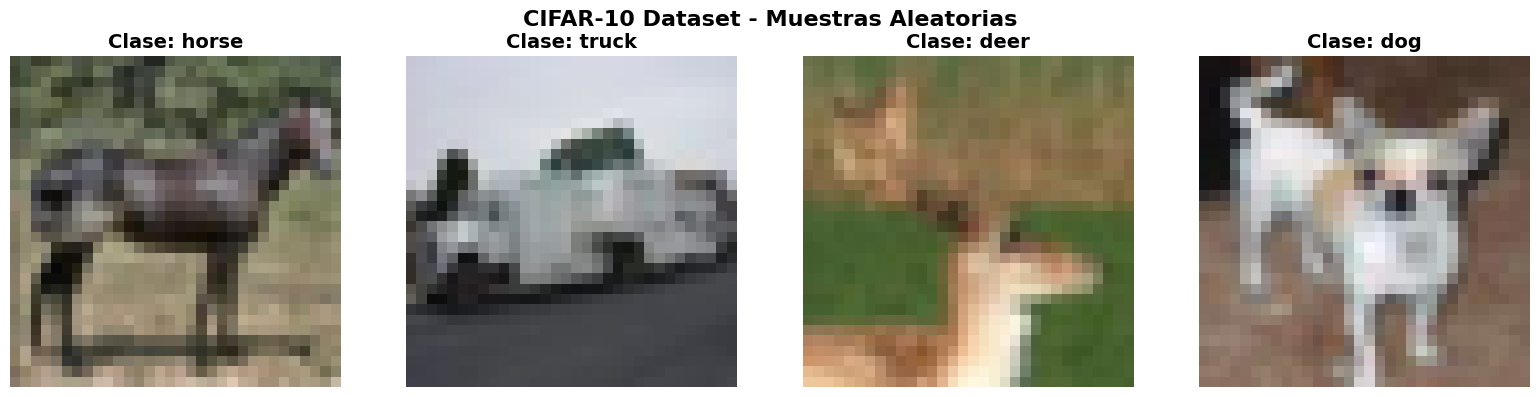


3. Mostrando muestras de MNIST...


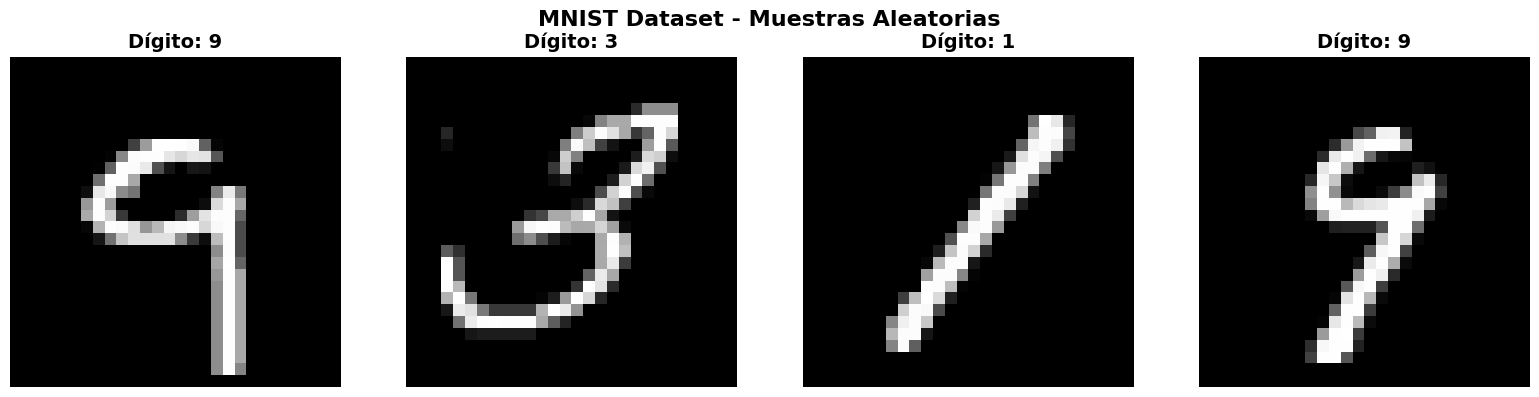

In [31]:
# Ejecutar la visualización de todos los datasets
show_all_datasets()